In [1]:
from SignalProcessing import RangeCompression,DopplerProcessing,CFAR
import Dataloader
import Plot
import numpy as np
from mmwave import dsp

In [44]:
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns; 
from matplotlib.colors import  LogNorm
from scipy.signal import butter, lfilter, freqz,detrend
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy import ndimage
from PIL import Image, ImageFilter
from scipy.ndimage import convolve1d

from operator import itemgetter
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
no_reflector = "felttest1/Record_2022-09-27_14-34-48/Record_2022-09-27_14-34-48.bin"
best_restult = "felttest1/Record_2022-09-27_14-14-14/Record_2022-09-27_14-14-14.bin"
munkholm = "felttest2/Record_2022-09-28_15-13-15/Record_2022-09-28_15-13-15.bin"

In [6]:
raw_data = Dataloader.ReadData(no_reflector)

1055904499
1054855663
1053806827
1052758015
1051709203
1050660379
1049611531
1048562719
1047513883
1046465023
1045416219
1044367371
1043318559
1042269723
1041220887
1040172051
1039123239
1038074463
1037025663
1035976827
1034928015
1033879227
1032830415
1031781615
1030732839
1029684027
1028635239
1027586439
1026537651
1025488839
1024440039
1023391239
1022342463
1021293639
1020244791
1019195943
1018147119
1017098283
1016049503
1015000687
1013951883
1012903067
1011854287
1010805555
1009756799
1008708043
1007659239
1006610483
1005561703
1004512923
1003464155
1002415363
1001366607
1000317851
999269119
998220351
997171571
996122791
995074023
994025279
992976511
991927731
990878927
989830159
988781379
987732611
986683855
985635111
984586355
983537567
982488755
981439955
980391167
979342379
978293579
977244743
976195955
975147143
974098307
973049483
972000647
970951859
969903035
968854271
967805483
966756683
965707883
964659083
963610271
962561459
961512611
960463787
959414951
958366127
957317

In [10]:
print(raw_data{1:-1})

b'\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [11]:
RADC = Dataloader.Decode(raw_data[1:-1])

In [13]:
Dataloader.SaveData(RADC, "no_reflector")

In [15]:
#data_IF =Dataloader.LoadData("best_restult.npy")
data_IF =Dataloader.LoadData("no_reflector.npy")

In [16]:
range_cube =  RangeCompression.RangeCompression(data_IF[170,0],axis=1)

In [17]:
linear, mag = DopplerProcessing.DopplerProcessing(range_cube, axis=0,isClutterRemoval=True)

In [18]:
doppler_map = np.abs(linear)

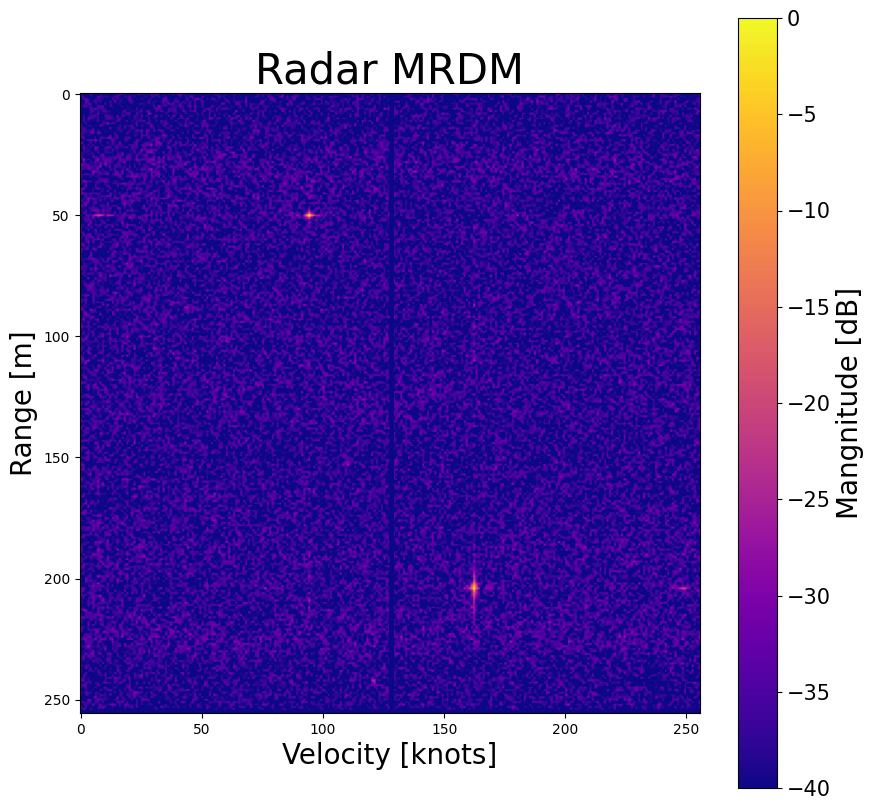

In [19]:
Plot.Plot(doppler_map,vmin=-40)

In [20]:
CFAR_plot =CFAR.CA_CFAR_2D(np.abs(doppler_map))

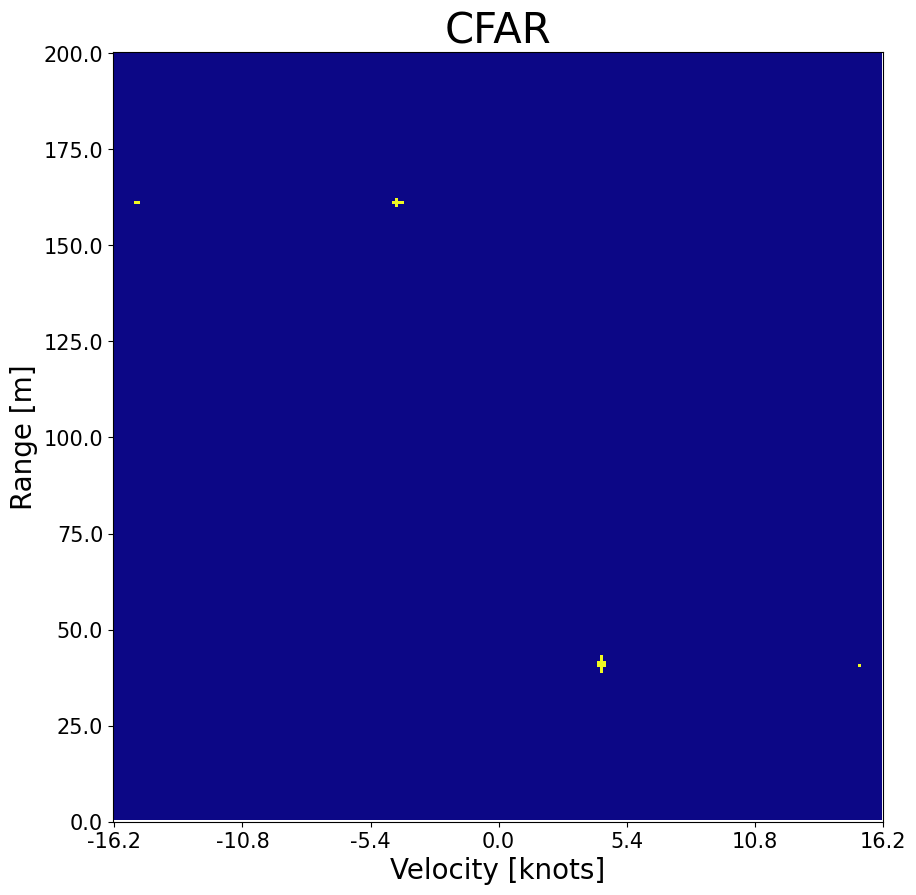

In [21]:
Plot.PlotCFAR(CFAR_plot)

In [22]:
from scipy.ndimage import convolve

In [55]:
def P_avg(P,N):
    return P
def alpha(N,P_FA):
    return(P_FA**(-1/N)-1)

def estimated_teshold(alpha,P):
    return alpha*np.abs(P)


def CFAR_1D(data, guard_cells, training_cells, PFA):
    
    
    window_size = guard_cells + training_cells
    
    window_area = (2*window_size+1)**2
    training_area = training_cells*2
    a = alpha(training_area, PFA)

    kernel = np.ones((1 + (2 * guard_cells) + (2 * training_cells)), dtype=data.dtype)
    kernel[training_cells:training_cells + (2 * guard_cells) + 1] = 0
    
    res = convolve1d(data.copy(), kernel, mode='wrap')
    
    
    ret = (np.abs(data)>estimated_teshold(a,res))

    
    

    
    
            
    return ret
                
                
    

            
  

In [24]:

doppler_map.shape

(256, 256)

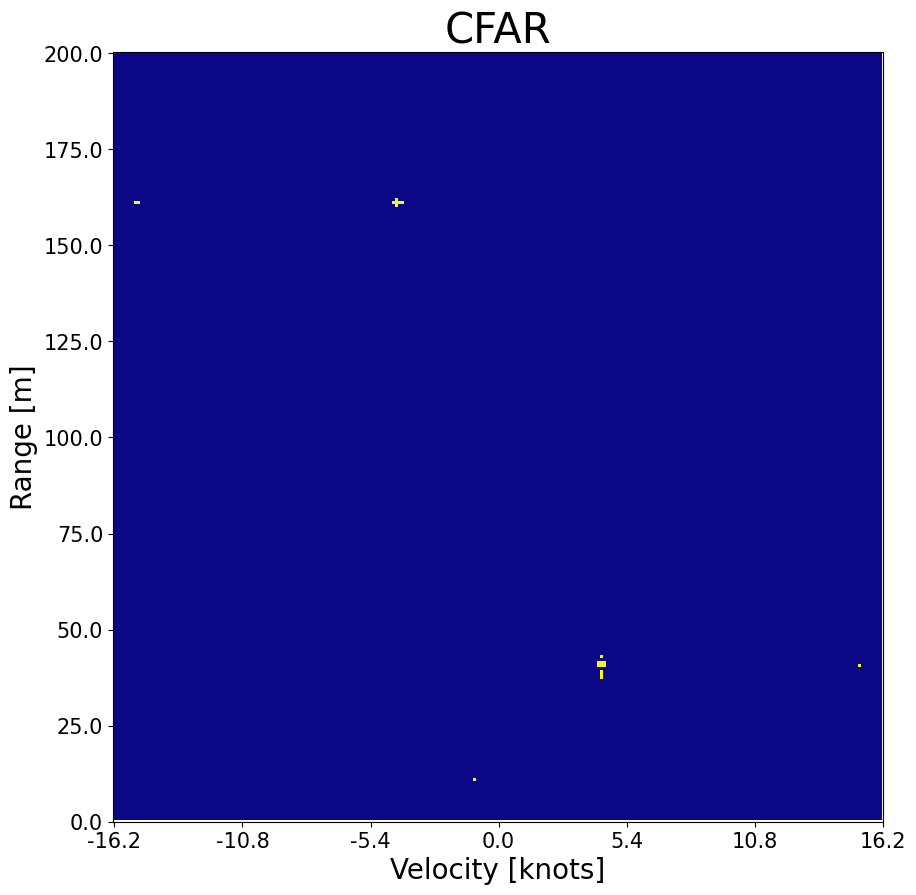

In [25]:
data_cfar = CFAR_2D(doppler_map.copy(), 4, 8, 0.01)
Plot.PlotCFAR(data_cfar)

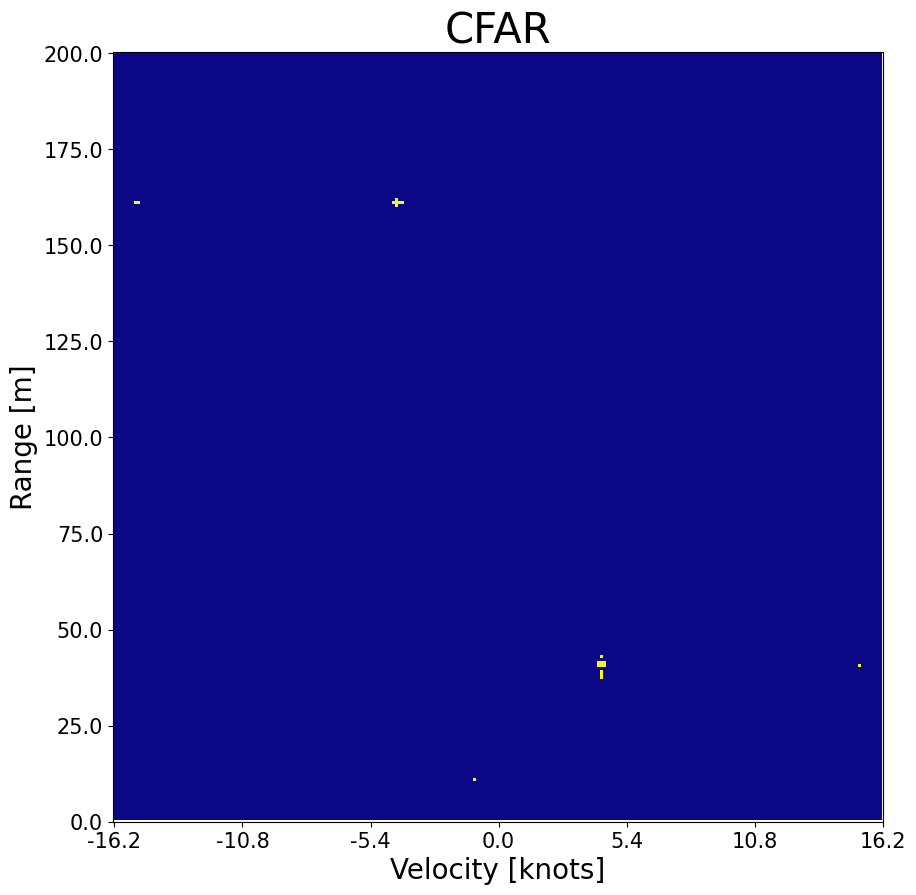

In [26]:
Plot.PlotCFAR(CFAR.CFAR_2D(doppler_map.copy(), 4, 8, 0.01))

In [58]:
import time

In [60]:
def algorithm_CA_CFAR_2D(data):
    start_time = time.time()
    range_cube =  RangeCompression.RangeCompression(data,axis=1)
    linear, mag = DopplerProcessing.DopplerProcessing(range_cube, axis=0,isClutterRemoval=True)
    #return CFAR.CA_CFAR_2D(np.abs(linear).copy())
    cfar = CFAR_1D(np.abs(linear).copy(), 4, 8, 0.01)
    print("--- %s seconds ---" % (time.time() - start_time))
    return cfar
    

    
    
            


In [61]:
def algorithm_cfar_1d(data):
    start_time = time.time()
    range_cube =  RangeCompression.RangeCompression(data,axis=1)
    linear, mag = DopplerProcessing.DopplerProcessing(range_cube, axis=0,isClutterRemoval=True)
    cfar = CFAR_1D(np.abs(linear).copy(), 4, 8, 0.01)
    print("--- %s seconds ---" % (time.time() - start_time))
    return cfar

In [62]:
def algorithm_cfar_2d(data):
    start_time = time.time()
    range_cube =  RangeCompression.RangeCompression(data,axis=1)
    linear, mag = DopplerProcessing.DopplerProcessing(range_cube, axis=0,isClutterRemoval=True)
    cfar = CFAR.CFAR_2D(np.abs(linear).copy(), 4, 8, 0.01)
    print("--- %s seconds ---" % (time.time() - start_time))
    return cfar

In [66]:
result_1 =algorithm_CA_CFAR_2D(data_IF[170,0])


--- 0.008064031600952148 seconds ---


In [67]:
result_2 =algorithm_cfar_1d(data_IF[170,0])


--- 0.004754781723022461 seconds ---


In [70]:
result_3 =algorithm_cfar_2d(data_IF[170,0])

--- 0.10293292999267578 seconds ---


In [28]:
cfar_arr=[]
for i in range(50,len(data_IF)):
    cfar_arr.append(algorithm(data_IF[i,0]))
    

In [35]:
cfar_arr_CA_CFAR_2D=[]
for i in range(50,len(data_IF)):
    cfar_arr_CA_CFAR_2D.append(algorithm(data_IF[i,0]))
    

In [56]:
cfar_arr_CFAR_1D=[]
for i in range(50,len(data_IF)):
    cfar_arr_CFAR_1D.append(algorithm(data_IF[i,0]))

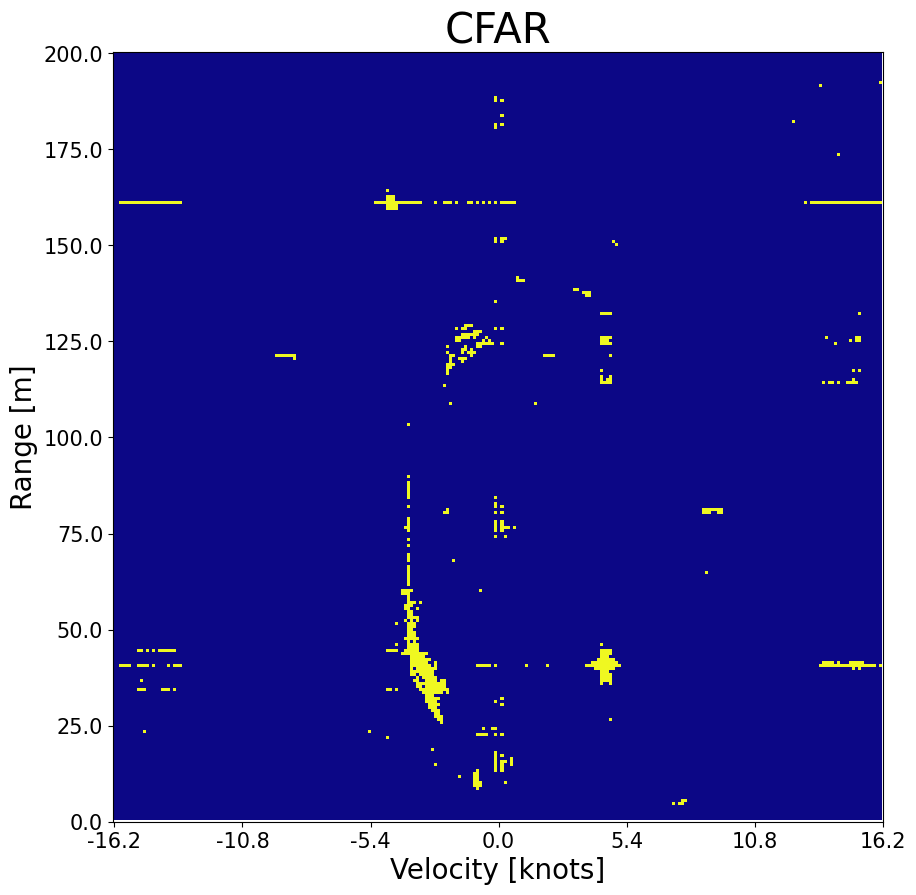

In [29]:
Plot.PlotCFAR(np.max(cfar_arr,axis=0))

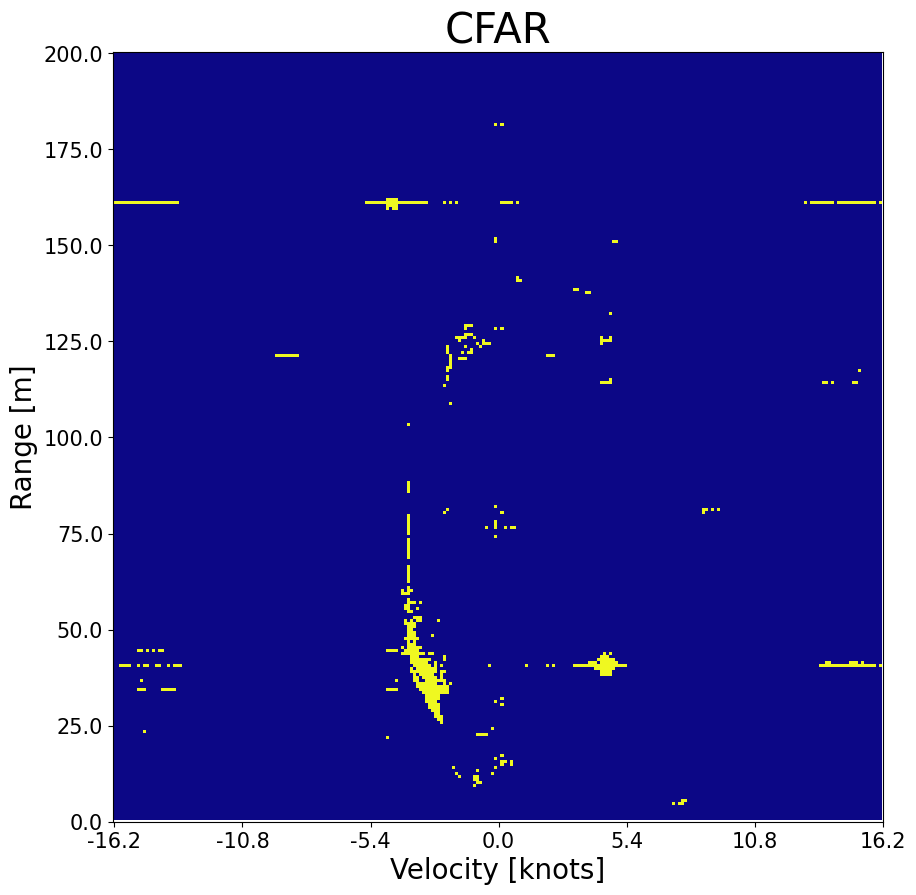

In [36]:

Plot.PlotCFAR(np.max(cfar_arr_CA_CFAR_2D,axis=0))

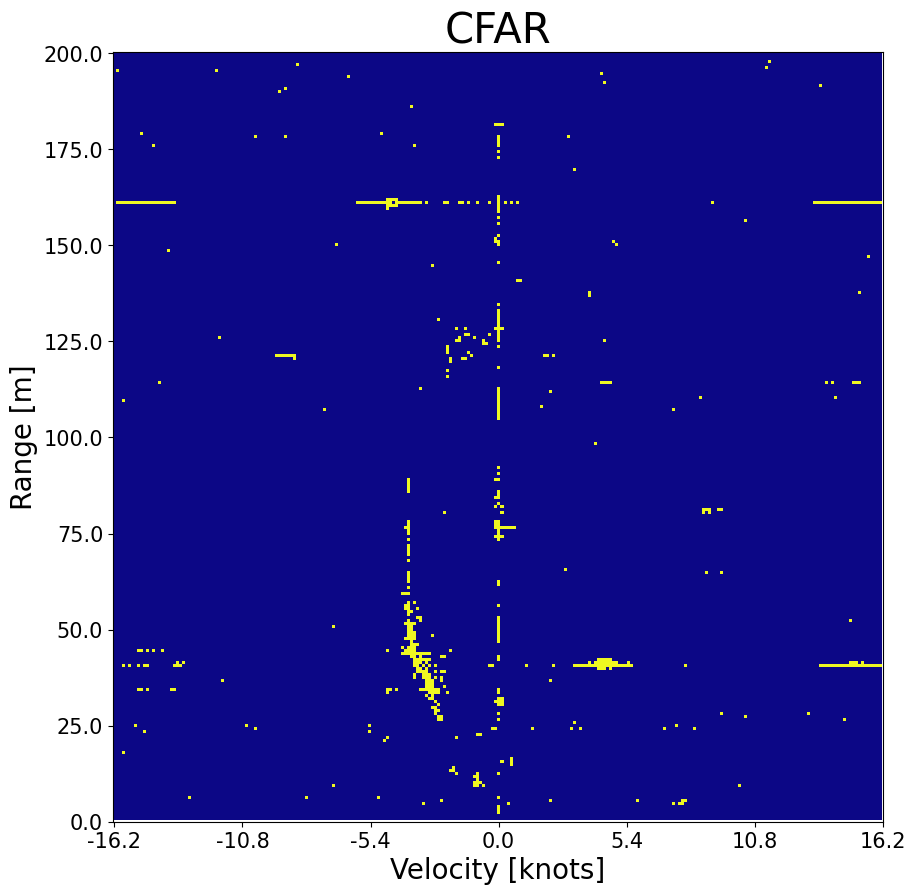

In [57]:
Plot.PlotCFAR(np.max(cfar_arr_CFAR_1D,axis=0))